In [223]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Populating the interactive namespace from numpy and matplotlib


In [224]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")

In [225]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 1) Explore the data

In [226]:
genes.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
2598,2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,-0.238816,0.212705,0.143891,-0.273079,0.293993,-0.416901,-0.563850,0.141600,0.390180,0.440435,-0.382377,-0.250367,0.407607,0.163053,-0.299922,0.514493,0.087441,0.869680,-0.188036,-0.095608,-0.067924,0.376718,0.248722,-0.360433,-0.218977,0.043815,-0.301484,0.293724,-0.465075,0.531631,-0.214568,0.555792,-0.121501,-0.295885,-0.072694,0.485399,0.010489,0.410930,-0.239219,0.072331,0.022814,-0.643175,0.319920,-0.512436,-0.528757,-0.333128,-0.242071,-0.051524,0.537861,0.980160,-0.183555,-0.265593,0.516068,0.319227,-0.231068,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,-0.327453,-1.021617,-0.672952,1.442040,2.676722,-0.478715,-0.686145,-0.738154,-0.859194,0.163937,1.415368,-0.640730,0.023372,-0.694698,-0.533619,0.138107,-0.498123,-0.127501,-0.391434,-0.639445,-0.556260,-0.659278,-0.518336,-2.183013,0.026728,1.893199,1.859095,-0.462593,-0.666251,-0.767953,1.688372,-0.343924,-0.311581,0.136260,-0.596877,-0.620736,-0.572075,-0.678667,-0.638840,-0.485775,-0.798542,-0.258415,-0.342933,-0.524371,-0.015912,0.039642,-0.345795,-0.382013,-0.359992,-0.689863,-0.512740,-0.799138,-0.523692,-0.322469,-0.576968,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,-0.108821,-0.015929,-0.304623,-0.301012,-0.046252,-0.794667,-0.725348,-0.409060,-0.404577,-0.182002,-0.260074,-0.183700,0.219292,0.083222,-0.362284,0.272878,-0.274763,0.323319,-0.659963,0.038166,-0.388417,-0.428360,0.097290,-0.288769,0.086806,-0.307646,0.044675,-0.022537,-0.647173,-0.036910,0.046848,0.006340,-0.500023,-0.690130,-0.052640,0.002277,-0.377863,0.068401,-0.578832,-0.142472,0.359693,-1.090517,-0.352789,-1.296877,-1.188341,-0.381231,-0.519686,-0.023191,0.238098,-0.432602,-1.050914,-0.364255,-0.127450,0.211059,-0.696601,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671
2601,2602,-0.136738,-0.473996,-0.065985,-0.389660,-0.246289,-0.234996,0.446785,-0.226391,-0.231487,0.046120,-0.323124,0.166398,-0.258344,0.074904,-0.444131,0.110371,-0.416839,-0.512814,-0.065219,-0.220263,-0.206653,-0.004274,0.345421,0.039575,0.337348,-0.487231,0.231773,-0.622266,-0.094176,-0.307941,-0.104431,-0.022862,-0.507242,-0.742570,-0.136429,-0.127410,0.211714,-0.340207,0.175548,-0.252186,0.320918,0.277043,0.175873,0.222156,0.142569,-0.130999,0.413624,0.030738,-0.286052,-0.601512,-0.207631,0.082818,-0.488113,-0.220010,-0.057875,0.018704,-0.005366,0.119388,-0.074321,-0.724086,-0.706197,-0.063034,0.011872,-0.681008,-0.009820,0.317453,0.242149,-0.427865,0.213364,-0.634293,-0.008888,-0.313828,-0.471017,-0.023894
2602,2603,-0.202742,-0.143678,0.357981,-0.806248,0.108837,0.101487,0.813528,0.589563,0.368431,0.414574,0.824976,0.609290,0.187906,0.518025,0.350774,-0.157054,0.745152,0.068545,0.397408,0.235402,0.260047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
genes = genes.dropna()

In [228]:
genes.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
2597,2598,-0.333845,0.272029,-0.170722,0.038204,-0.097601,-0.592688,0.338378,-0.152175,0.302457,0.858478,0.612728,0.798413,-0.074987,-0.101329,0.035727,1.223787,0.501536,-0.221922,0.198730,-0.162719,-0.224508,0.416082,0.798274,0.565726,1.036770,-0.028511,0.604910,0.758421,0.180570,-0.048130,0.160761,0.767082,-0.112632,-0.714683,0.223895,-0.067593,0.668344,-0.341806,1.174946,-0.820180,0.668438,0.260152,0.283950,0.311216,0.406892,-0.129764,0.001022,-0.562256,0.676841,-0.133006,-0.289487,-0.065841,0.511111,-0.147058,0.256840,0.573302,0.197602,0.355579,-0.014361,-1.966987,-0.580087,0.146101,-0.259570,-0.031178,-0.559128,0.236490,0.171963,0.124660,1.121866,-0.486518,-0.642105,-0.423110,-0.269496,0.510805
2598,2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,-0.238816,0.212705,0.143891,-0.273079,0.293993,-0.416901,-0.563850,0.141600,0.390180,0.440435,-0.382377,-0.250367,0.407607,0.163053,-0.299922,0.514493,0.087441,0.869680,-0.188036,-0.095608,-0.067924,0.376718,0.248722,-0.360433,-0.218977,0.043815,-0.301484,0.293724,-0.465075,0.531631,-0.214568,0.555792,-0.121501,-0.295885,-0.072694,0.485399,0.010489,0.410930,-0.239219,0.072331,0.022814,-0.643175,0.319920,-0.512436,-0.528757,-0.333128,-0.242071,-0.051524,0.537861,0.980160,-0.183555,-0.265593,0.516068,0.319227,-0.231068,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,-0.327453,-1.021617,-0.672952,1.442040,2.676722,-0.478715,-0.686145,-0.738154,-0.859194,0.163937,1.415368,-0.640730,0.023372,-0.694698,-0.533619,0.138107,-0.498123,-0.127501,-0.391434,-0.639445,-0.556260,-0.659278,-0.518336,-2.183013,0.026728,1.893199,1.859095,-0.462593,-0.666251,-0.767953,1.688372,-0.343924,-0.311581,0.136260,-0.596877,-0.620736,-0.572075,-0.678667,-0.638840,-0.485775,-0.798542,-0.258415,-0.342933,-0.524371,-0.015912,0.039642,-0.345795,-0.382013,-0.359992,-0.689863,-0.512740,-0.799138,-0.523692,-0.322469,-0.576968,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,-0.108821,-0.015929,-0.304623,-0.301012,-0.046252,-0.794667,-0.725348,-0.409060,-0.404577,-0.182002,-0.260074,-0.183700,0.219292,0.083222,-0.362284,0.272878,-0.274763,0.323319,-0.659963,0.038166,-0.388417,-0.428360,0.097290,-0.288769,0.086806,-0.307646,0.044675,-0.022537,-0.647173,-0.036910,0.046848,0.006340,-0.500023,-0.690130,-0.052640,0.002277,-0.377863,0.068401,-0.578832,-0.142472,0.359693,-1.090517,-0.352789,-1.296877,-1.188341,-0.381231,-0.519686,-0.023191,0.238098,-0.432602,-1.050914,-0.364255,-0.127450,0.211059,-0.696601,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671
2601,2602,-0.136738,-0.473996,-0.065985,-0.389660,-0.246289,-0.234996,0.446785,-0.226391,-0.231487,0.046120,-0.323124,0.166398,-0.258344,0.074904,-0.444131,0.110371,-0.416839,-0.512814,-0.065219,-0.220263,-0.206653,-0.004274,0.345421,0.039575,0.337348,-0.487231,0.231773,-0.622266,-0.094176,-0.307941,-0.104431,-0.022862,-0.507242,-0.742570,-0.136429,-0.127410,0.211714,-0.340207,0.175548,-0.252186,0.320918,0.277043,0.175873,0.222156,0.142569,-0.130999,0.413624,0.030738,-0.286052,-0.601512,-0.207631,0.082818,-0.488113,-0.220010,-0.057875,0.018704,-0.005366,0.119388,-0.074321,-0.724086,-0.706197,-0.063034,0.011872,-0.681008,-0.009820,0.317453,0.242149,-0.427865,0.213364,-0.634293,-0.008888,-0.313828,-0.471017,-0.023894


In [229]:
genes.drop(genes.columns[[0]], axis=1, inplace=True)

In [230]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 2) Preprocess the data

In [231]:
scaledgenes = skl.preprocessing.scale(genes)

In [232]:
scaledgenes

array([[-0.14601929, -1.48885627,  0.51463842, ...,  1.09802038,
         0.43679723,  1.00690557],
       [-0.79272802,  0.46433166,  0.66689818, ...,  0.92310118,
        -0.7496697 ,  0.6306221 ],
       [-0.02985374, -0.58685532, -0.47056478, ..., -0.42086741,
        -0.56521196, -0.06347335],
       ...,
       [-0.18957236, -0.89910719,  0.24766294, ..., -1.09357127,
        -0.56646353,  1.04572608],
       [-1.45570084, -0.89836852, -1.01046701, ..., -0.32237148,
        -1.17806261,  0.18583484],
       [-0.12657512, -1.35418784, -0.21420423, ..., -0.65163444,
        -0.66869512, -0.03931063]])

In [233]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
         0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [234]:
twodproj = skl.manifold.TSNE().fit_transform(scaledgenes)

In [235]:
twodproj.shape

(2602, 2)

In [249]:
twodproj

array([[  4.403519 , -18.142895 ],
       [  4.249365 , -18.1955   ],
       [-13.353944 ,  -8.3737755],
       ...,
       [-30.258736 , -28.82294  ],
       [-40.373833 , -11.841237 ],
       [-15.031493 , -10.754724 ]], dtype=float32)

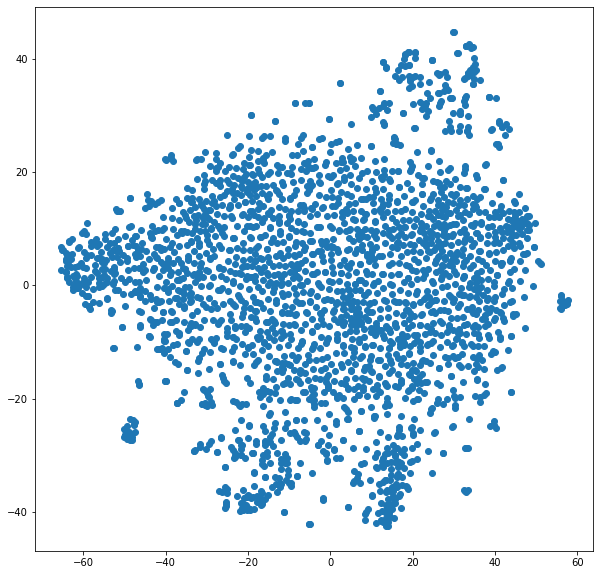

In [248]:

pl.figure(figsize = (10,10))
x = twodproj[:,0]
y = twodproj[:,1]
plt.plot(x,y,"o")

In [238]:
def edistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=1))
def calcICVar(X, labels, model,n_clusters):
  icv = np.zeros(n_clusters) 
  for i in range(n_clusters):
    icv[i] = ((edistance(model.cluster_centers_[i], X[labels==i])**2).sum() / ((labels == i).sum() - 1)).sum()
  return(icv.sum())

# 3) K-Means Clustering

In [239]:
kmeansmod  = skl.cluster.KMeans(n_clusters=10).fit(twodproj)

In [240]:
kmeansmod.cluster_centers_

array([[-51.98696  ,   4.0923076],
       [  5.93488  ,  12.770938 ],
       [-17.030209 , -30.377224 ],
       [ 36.324417 ,   6.6563683],
       [-34.38666  ,  -8.886178 ],
       [ 12.28365  , -30.320448 ],
       [-21.819221 ,  13.215581 ],
       [ 25.885221 ,  32.05618  ],
       [ 24.503117 , -10.442829 ],
       [ -4.00906  ,  -7.9000106]], dtype=float32)

Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

Text(0, 0.5, 'Intracluster Variance')

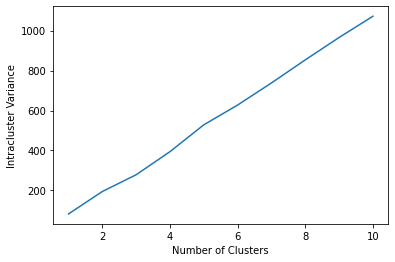

In [241]:
X = np.vstack([twodproj])

VarArray = []
for i in range(1,11):
  VarArray.append(calcICVar(X, kmeansmod.labels_, kmeansmod, i))

x = np.arange(1,11,1)
y = VarArray
plt.plot(x,y)
plt.xlabel("Number of Clusters")
plt.ylabel("Intracluster Variance")

The Intracluster Variance as a function of the number of clusters. Four appears to be the optimal number of clusters, but it is difficult to tell.

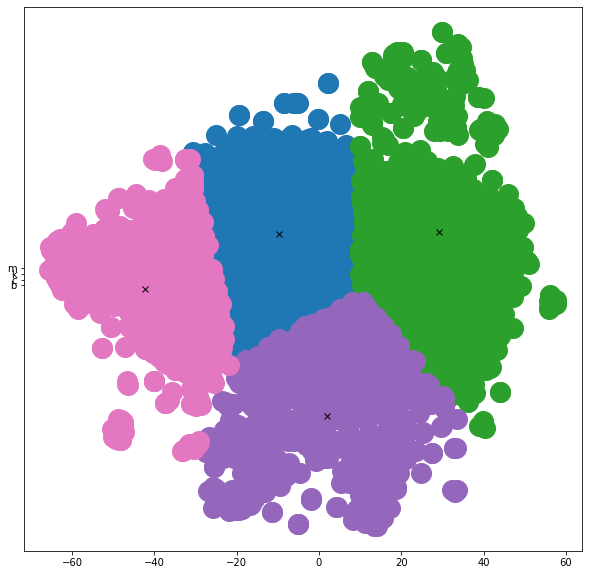

In [242]:
pl.figure(figsize = (10,10))
kmeansmod  = skl.cluster.KMeans(n_clusters=4).fit(twodproj)


pl.plot(twodproj[kmeansmod.labels_ == 0][:,0], twodproj[kmeansmod.labels_ == 0][:,1],"o",'b',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 1][:,0], twodproj[kmeansmod.labels_ == 1][:,1],"o",'c',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 2][:,0], twodproj[kmeansmod.labels_ == 2][:,1],"o",'k',ms=20)
pl.plot(twodproj[kmeansmod.labels_ == 3][:,0], twodproj[kmeansmod.labels_ == 3][:,1],"o",'m',ms=20) #something weird is going on here

pl.plot(kmeansmod.cluster_centers_[3,0], kmeansmod.cluster_centers_[3,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[2,0], kmeansmod.cluster_centers_[2,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[1,0], kmeansmod.cluster_centers_[1,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[0,0], kmeansmod.cluster_centers_[0,1], 'kx')

My first cluster plot before realizing there was condensed code. This plot features marked centers.

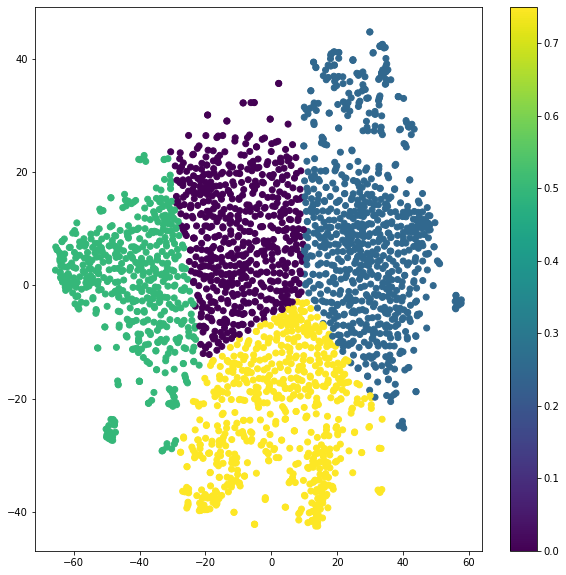

In [243]:
pl.figure(figsize = (10,10))
geneclustersKM = cluster.KMeans(n_clusters=4).fit(twodproj)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();

The clusters on the TSNE projection. There are four clusters indicated by different colors.

# 4) Agglomerative Hierarchical Clustering

In [244]:
model = skl.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean')
model.fit(scaledgenes[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

<Figure size 432x288 with 0 Axes>

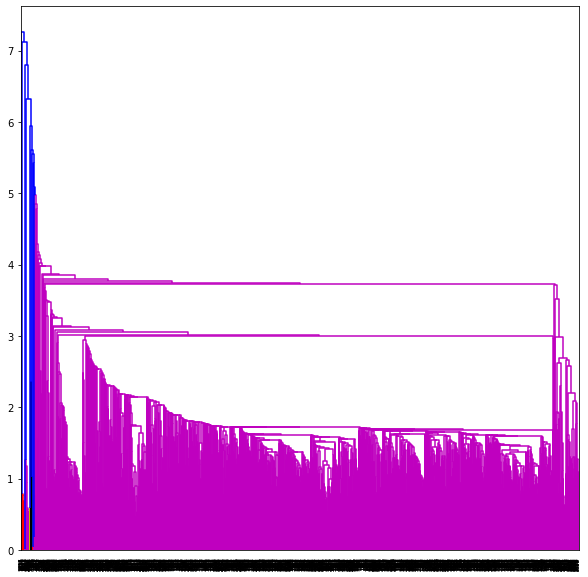

In [245]:
Z = hierarchy.linkage(twodproj)
plt.figure()
pl.figure(figsize = (10,10))
dn = hierarchy.dendrogram(Z)

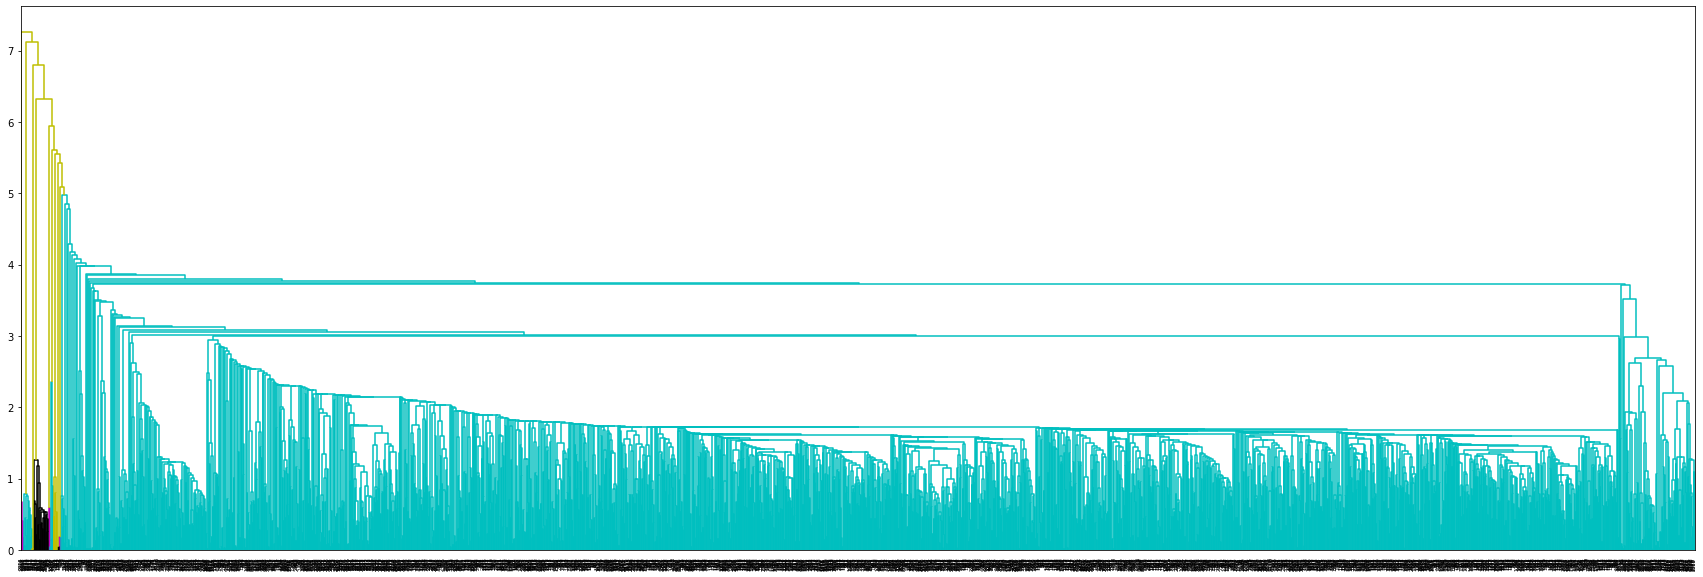

In [246]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
pl.figure(figsize = (30,10))
dn1 = hierarchy.dendrogram(Z,  above_threshold_color='y')

hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

